##This script creates a new choice set centered around the trial of subjective equality in the CRDM task.

- It uses data derived from the utility model and the parameter values (alpha and beta) of the subjective value equation:

 ![image.png](https://cdn.jamanetwork.com/ama/content_public/journal/psych/938422/m_yoi190087ea.png?Expires=1691689740&Signature=OvJ06Ayrw5fJLEycmRUj9I6GyITQwp89ZN5rVQDOm8dU1z6ZvhwNCwFV8yKnBDDEgxFqnaUQWgV7viAKHn5NpRdiVPo-Rgc8kjwYTn-0dnbudBGSoeVtaw8gTSIUiLLnWWVj2sPafVJA9NhK3bivpgCt2RLxI2UJRYUuNUmrrx1CFwyJTKYPlljeVSSEZ3Iwc9dNmvZ4p71MmTQSt8a9KcXSmZ0r0IZhQ187TDnqEFIiAN3mv9A7snMUAnhROj0Fg1p5COdoTVA9Z3RVNw8AT8QgJNSKl44244OjAauQwcnETbDdh2NPeCv4NGXYVclFTopaMriRPqUO4y-QPdDQjw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

- With those parameters (for now, only alpha) it finds the trial nearest to subjective equality (*i.e* the trial where it is the same to the participant to choose the certain amount v.s the lottery --> *P(choosing) aprox 0.5*
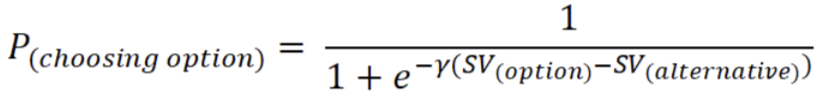
- Then, it creates a new choice set centered around the subjective equality trial (work in progress).  

# 0. Import the relevant packages

In [5]:
import pandas as pd
import os

In [19]:
# Load the Drive helper and mount
# from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')
# !ls "/content/drive/My Drive/NIH/2 Visit/utility_CRDM_analysis.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/NIH/2 Visit/utility_CRDM_analysis.csv'


#1. Input the participant's session id and retrieve the parameters

In [2]:
participant_code = input ("")
print('the Participant Code is ' + participant_code)


the Participant Code is 23_IDM_0021


In [6]:
#Define files & data pathway (Local Folder)
# participant_code = '23_IDM_0021'
split_dir = '/Volumes/UCDN/datasets/IDM/split/'
participant_trials = os.path.join(split_dir,'{}/crdm/{}_crdm.csv'.format(participant_code,participant_code))
print('loading fn: {}'.format(participant_trials))
trials = pd.read_csv(participant_trials)
parameters = pd.read_csv('utility_CRDM_analysis.csv')

loading fn: /Volumes/UCDN/datasets/IDM/split/23_IDM_0021/crdm/23_IDM_0021_crdm.csv


In [8]:
#Define the parameter values for the given participant. This declares the varaibles we are gonna work with
# and gets the data from the CSV file
filtered_parameters = parameters[parameters['subject'] == participant_code]

alpha = filtered_parameters['alpha'].values[0]
beta = filtered_parameters['beta'].values[0]
gamma = filtered_parameters['gamma'].values[0]
print ("alpha: " + str(alpha))
print ("beta: " + str(beta))
print ("gamma: " + str(gamma))

alpha: 0.495323857
beta: 0.221680178
gamma: 4.100226383


#2. Trial with lowest SV difference
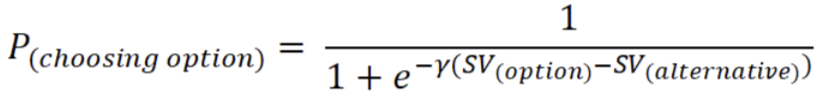

* We want to find the trial which has the closes p(choosing) to 0.50 (50%). That would be the trial that has the smallest SV difference betwwen the SVsafe and SValternative

In [7]:
#We create a new column in the SV difference CSV to know which trial has the lowest SV difference (Local folder)
utility_dir = '/Volumes/UCDN/datasets/IDM/utility'
participants_SV = os.path.join(utility_dir,"{}/crdm/{}_crdm_SV_hat.csv".format(participant_code,participant_code))
SV_delta = pd.read_csv(participants_SV)
num_trials = SV_delta.shape[0]
SV_delta['trial'] = range(1, num_trials + 1)
SV_delta.to_csv('SVdelta_trials', index = False)

In [9]:
'''We compute the absolute value and assign it to a trial'''
# Read the CSV file into a DataFrame
data = pd.read_csv('SVdelta_trials')

# Specify the column you want to analyze
column_name = 'SV_delta'

# Calculate the absolute values
data['AbsoluteValue'] = data[column_name].abs()

# Find the value with the least absolute value
min_value = data[column_name].loc[data['AbsoluteValue'].idxmin()]

#Knowing the lowest SV delta value, we look for the trial
filtered_SV_delta = data[data['SV_delta'] == min_value]
SE = filtered_SV_delta['trial'].values[0]
print('The trial closest to Subjective Equalitiy is trial #' + str(SE))

The trial closest to Subjective Equalitiy is trial #28


In [13]:
#Now, we go to the trial CSV file to look up the structure of trial 28
filtered_trials = trials.loc[trials['crdm_trial_type'] == 'task'] #We should add the new column without filtering first.
num_trials = filtered_trials.shape[0]
filtered_trials['trial'] = range(1, num_trials + 1)
filtered_trials.to_csv('trials_num', index = False)


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_44379/1075317567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trials['trial'] = range(1, num_trials + 1)


In [14]:
filtered_trials = trials.copy()  # Make a copy of the DataFrame

filtered_trials.loc[filtered_trials['crdm_trial_type'] == 'task', 'trial'] = range(1, num_trials + 1)

filtered_trials.to_csv('trials_num.csv', index=False)  # Save DataFrame to a CSV file



In [15]:
#Let's find the structure of the subjective equality trial
SE_trial = filtered_trials[filtered_trials['trial'] == SE]
crdm_sure_amt = SE_trial['crdm_sure_amt'].values[0]
crdm_lott = SE_trial['crdm_lott_top'].values[0] + SE_trial['crdm_lott_bot'].values[0]
prob = SE_trial ['crdm_lott_p'].values[0]

#Confirm the identities
print ('Certain $' + str(crdm_sure_amt))
print ("Lottery $" + str(crdm_lott))
print ("Probability of winning " + str(prob) + "%")

Certain $5.0
Lottery $20.0
Probability of winning 50.0%


#3. Creating the choice set
From   
![image.png](https://cdn.jamanetwork.com/ama/content_public/journal/psych/938422/m_yoi190087ea.png?Expires=1691689740&Signature=OvJ06Ayrw5fJLEycmRUj9I6GyITQwp89ZN5rVQDOm8dU1z6ZvhwNCwFV8yKnBDDEgxFqnaUQWgV7viAKHn5NpRdiVPo-Rgc8kjwYTn-0dnbudBGSoeVtaw8gTSIUiLLnWWVj2sPafVJA9NhK3bivpgCt2RLxI2UJRYUuNUmrrx1CFwyJTKYPlljeVSSEZ3Iwc9dNmvZ4p71MmTQSt8a9KcXSmZ0r0IZhQ187TDnqEFIiAN3mv9A7snMUAnhROj0Fg1p5COdoTVA9Z3RVNw8AT8QgJNSKl44244OjAauQwcnETbDdh2NPeCv4NGXYVclFTopaMriRPqUO4y-QPdDQjw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

We now have all the elements to calculate subjective value.


In [37]:
ado_out_fn = '/tmp/ADO_crdm_simulation.csv'
ado_out_df = pd.read_csv(ado_out_fn)
ado_last_row = ado_out_df.iloc[[-1]]
ado_alpha,ado_beta,ado_gamma,ado_prob,ado_value,ado_amb = ado_last_row[['mean_alpha','mean_beta','mean_gamma','p_reward','value_reward','amb_level']].values[0]
print(ado_alpha,ado_beta,ado_gamma,ado_prob,ado_value,ado_amb)

0.8986588674223884 -2.484802188787252 0.5044811271571049 0.5 5.0 0.74


In [38]:
#Declare the variables
'''
p = prob/100
v = crdm_lott
sv = p *(v**alpha)
'''
p = ado_prob
v = ado_value
beta = ado_beta
A = ado_amb
alpha = ado_alpha
sv = (p - beta*A/2)*v**alpha
# sv = p *(v**alpha)
print('The SV of the equivalence trial is ' + str(sv))   # Example value for sv
print ('The probability of reward: ' + str(p))
print ('The alpha parameter from the model: ' + str(alpha))    # Example value for alpha

The SV of the equivalence trial is 6.028833608218554
The probability of reward: 0.5
The alpha parameter from the model: 0.8986588674223884


From the SV, we compute V, using the formula:

$v = \left(\frac{SV}{p-\frac{\beta A}{2}}\right)^\frac{1}{\alpha}$


In [17]:
#Computing new V with (sv/p)**1/alpha
def new_v(sv, p, alpha):
  values = []
  for x in [1/15,1/10,1/5, 1/2, 1, 2, 5, 10, 15]:
    v1 = (x * sv / p) ** (1 / alpha)
    values.append(v1)
  return values

sv = 2.204962459791904
p = 0.5
alpha = 0.495323857

new_choicesv = new_v(sv, p, alpha)
new_choicesV = ["{:.2f}".format(v1) for v1 in new_choicesv]
print(new_choicesV)



['0.08', '0.19', '0.78', '4.93', '20.00', '81.05', '515.43', '2088.87', '4736.07']


In [18]:
values1V = [[0.5, float(value)] for value in new_choicesV]
print(values1V)

[[0.5, 0.08], [0.5, 0.19], [0.5, 0.78], [0.5, 4.93], [0.5, 20.0], [0.5, 81.05], [0.5, 515.43], [0.5, 2088.87], [0.5, 4736.07]]


In [39]:
#Computing new V with (sv/p)**1/alpha for all the possible probabilities distributions in our choiceset, but keeping a constant SV.
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]
# sv = 2.204962459791904
# alpha = 0.495323857

def new_vp(sv, alpha,beta,A):
  valuesP = {}
  for p in p_options:
    v_new = (sv / (p-beta*A/2)) ** (1 / alpha)
    valuesP[p] = v_new
  return valuesP

new_choicesp = new_vp(sv, alpha,beta,A)
new_choicesP = {k: "{:.2f}".format(v) for k, v in new_choicesp.items()}

print(new_choicesP)


{0.87: '3.86', 0.75: '4.17', 0.62: '4.57', 0.5: '5.00', 0.38: '5.52', 0.25: '6.20', 0.13: '7.00'}


#4. The new choices CSV

In [20]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(new_choicesP.items()), columns=['crdm_lott_p', 'crdm_lott_top'])

# Specify the filename for the new CSV file
choice_set = 'crdm_trials.csv'

# Save the DataFrame to a CSV file
df.to_csv(choice_set, index=False)

print(f"CSV file '{choice_set}' created successfully.")
pd.read_csv(choice_set)

CSV file 'crdm_trials.csv' created successfully.


,crdm_lott_p,crdm_lott_top
0,0.87,6.54
1,0.75,8.82
2,0.62,12.95
3,0.50,20.00
4,0.38,34.81
5,0.25,81.05
6,0.13,303.48




*   **All these choices have the same SV, so, how do create new choices around it?**
    - Multiply its value by certain units.
    - Mutiply the SV inside the formula for certain units and provide a limit.



##It's not much but it's honest work
![python](https://plantillasdememes.com/img/plantillas/no-es-mucho-pero-es-trabajo-honesto01569991155.jpg)